# Projet DataMining 

Le but de ce projet est d'apprendre à récupérer, gérer, analyser et mettre en forme des données.

De août à décembre, un fichier json a été récupéré toutes les 15 minutes sur le site data.angers, qui fournit un certain nombre de données en open source.

Chaque fichier json comporte:

- Un en-tête qui contient :
    - Nombre de bus à l'instant t : ```nhist```,
    - Des paramètres avec le nom du jeu de données, son format, le nombre de lignes qu'il contient, sa timezone
- Les informations sur le bus :
    - ```idvh``` Identifiant SAE véhicule
    - ```novh``` N° de parc du véhicule
    - ```type``` Modèle du véhicule
    - ```etat``` Etat SAE du véhicule
    - ```idligne``` Identifiant SAE de ligne
    - ```iddesserte``` Identifiant SAE de désserte
    - ```x``` Coordonnées GPS Lambert 2
    - ```y``` Coordonnées GPS Lambert 2
    - ```cap``` Cap du véhicule en degrés (gyromètre)
    - ```coordonnees``` Coordonnées GPS WG84
    - ```sv``` Service voiture
    - ```idarret``` Identifiant SAE de l'arrêt
    - ```harret``` Heure estimée de passage à L'arrêt
    - ```ecart``` Ecart horaire en secondes
    - ```mnemoligne``` Mnemo de la ligne
    - ```nomligne``` Nom de la ligne
    - ```mnemoarret``` Mne de l'arrêt
    - ```nomarret``` Nom de l'arrêt
    - ```numarret``` N° Timéo de l'arrêt
    - ```idparcours``` Identifiant SAE du parcours
    - ```dest``` Destination


# Import des modules

In [3]:
import datetime as dt
from dateutil.parser import parse
from glob import glob
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
sns.set(style="whitegrid")
import requests

# Utilisation de l'API

L'api permet d'avoir accès aux données du réseau de bus en temps réel.

Voici comment s'y connecter.

In [309]:
r = requests.get("https://data.angers.fr/api/records/1.0/search/",
                params= {
                    "dataset": "bus-tram-position-tr",
                    "rows":10
                })

# test d'erreur
r.raise_for_status()

# La réponse
pprint(r.json())

{'nhits': 116,
 'parameters': {'dataset': 'bus-tram-position-tr',
                'format': 'json',
                'rows': 10,
                'start': 0,
                'timezone': 'UTC'},
 'records': [{'datasetid': 'bus-tram-position-tr',
              'fields': {'cap': 180,
                         'coordonnees': [47.493087, -0.56542577],
                         'dest': 'CIRCULAIRE SENS A',
                         'ecart': 0,
                         'etat': 'TDEP',
                         'harret': '2021-02-26T15:35:00+00:00',
                         'idarret': 2519517,
                         'iddesserte': 268775425,
                         'idligne': 268435461,
                         'idparcours': 268775424,
                         'idvh': 268436259,
                         'mnemoarret': 'AQUA-D5A',
                         'mnemoligne': '05',
                         'nomarret': 'AQUA VITA',
                         'nomligne': 'CIRCULAIRE VERNEAU GARE EUROPE',
     

              'record_timestamp': '2021-02-26T15:31:57.548000+00:00',
              'recordid': '58d6606ab15a377baf27fad8857c7941efc6b8d8'}]}


Une ligne correspond à un bus, "nhists" nous indique le nombre de bus à l'instant t.

Si on veut obtenir le nombre de bus en circulation:

In [ ]:
def nhits_bus(url) :
    r = requests.get(url,
                params= {
                    "dataset": "bus-tram-position-tr",
                    "rows":-1
                })

    #test d'erreur
    r.raise_for_status()
    
    d = r.json()
    
    return d['nhits']

In [ ]:
nb_bus = nhits_bus("https://data.angers.fr/api/records/1.0/search/")
print(f"Nombre de bus en circulation à l'instant : {nb_bus}")

# Analyse des données historisées

Les données historisées sont présentes à cette endroit : 
https://cdn.aeon-creation.com/ESPL/angers-bus-trams.7z

Plusieurs techniques sont possibles pour les récupérer. 

- Se servir directement des fichiers dézippés, le plus simple étant de placer le dossier à l'endroit où vous travaillez,
- Si vous travaillez sous Linux : récupérer le fichier ```angers-bus-trams.7z```, le placer dans à l'endroit du projet, puis utiliser cette commande dans le terminal afin de le dézipper : ```7z e angers-bus-trams.7z *2019-11-12*.json``` pour une certaine date, ```7z e angers-bus-trams.7z *.json```.

## Création du DataFrame

### Un fichier

In [ ]:
with open('Data/angers-bus-trams_2019-08-05T17_45_04.461273.json', 'r') as json_file:
    data = json.load(json_file)
    df = pd.DataFrame([bus['fields'] for bus in data['records']])
    
    ## On récupère la date 
    
    # 1. On coupe sur l'expression trams_ et on récupère la partie droite
    s = file.split('trams_')[1]
    # 2. On coupe sur les points '.' et on récupère la partie gauche
    s = s.split('.')[0]
    # 3. On transforme en date
    date = dt.datetime.strptime(s, '%Y-%m-%dT%H_%M_%S')
    
    df['date'] = date

In [ ]:
df

### Tous les fichiers

In [5]:
path = "angers-bus-tram"

In [6]:
# Création d'un dataframe pour chaque json
raw_list = glob(path + "/*.json")
files = sorted(raw_list)
pprint(files[:10])




['angers-bus-tram/angers-bus-trams_2019-08-05T17_45_04.461273.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T18_00_04.363175.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T18_15_04.259756.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T18_30_02.495385.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T18_45_03.269980.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T19_00_03.591938.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T19_15_02.318429.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T19_30_03.825331.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T19_45_03.975363.json',
 'angers-bus-tram/angers-bus-trams_2019-08-05T20_00_04.850444.json']


In [7]:
# Permettra de stocker tous les df, afin de les concaténer
liste_df = []

# Permettont de stocker les dates et les nhits, afin d'en faire un df 
# spécifique
liste_dates = []
liste_nb = []

for index, file in enumerate(files[:1000]):
    print(f"{index}/{len(files)}")
    with open(file, 'r') as json_file:
    
        try:
            data = json.load(json_file)
            dft = pd.DataFrame(
                [bus['fields'] for bus in data['records']])

            ## On récupère la date 
            # 1. On coupe sur l'expression trams_ et on récupère 
            # la partie droite
            s = file.split('trams_')[1]
            # 2. On coupe sur les points '.' et on récupère la 
            # partie gauche
            s = s.split('.')[0]
            # 3. On transforme en date
            date = dt.datetime.strptime(s, '%Y-%m-%dT%H_%M_%S')
            dft['date'] = date
            
             # On stock le df
            liste_df.append(dft)
            
            # On stock la date et le nombre de bus à cet instant
            liste_dates.append(date)
            liste_nb.append(data['nhits'])
            
        # Certains json sont vides, on les passe
        except Exception as e:
            print(e,json_file.name)
            continue
    
# On concatène tous les df afin d'avoir toutes les infos dans un seul 
# et même endroit
df = pd.concat(liste_df)

# On créé la série du nombre de bus pour une date donnée
df_nb = pd.DataFrame(data=liste_nb, index=liste_dates, columns=['Nb_bus'])

0/12326
1/12326
2/12326
3/12326
4/12326
5/12326
6/12326
7/12326
8/12326
9/12326
10/12326
11/12326
12/12326
13/12326
14/12326
15/12326
16/12326
17/12326
18/12326
19/12326
20/12326
21/12326
22/12326
23/12326
24/12326
25/12326
26/12326
27/12326
28/12326
29/12326
30/12326
31/12326
32/12326
33/12326
34/12326
35/12326
36/12326
37/12326
38/12326
39/12326
40/12326
41/12326
42/12326
43/12326
44/12326
45/12326
46/12326
47/12326
48/12326
49/12326
50/12326
51/12326
52/12326
53/12326
54/12326
55/12326
56/12326
57/12326
58/12326
59/12326
60/12326
61/12326
62/12326
63/12326
64/12326
65/12326
66/12326
67/12326
68/12326
69/12326
70/12326
71/12326
72/12326
73/12326
74/12326
75/12326
76/12326
77/12326
78/12326
79/12326
80/12326
81/12326
82/12326
83/12326
84/12326
85/12326
86/12326
87/12326
88/12326
89/12326
90/12326
91/12326
92/12326
93/12326
94/12326
95/12326
96/12326
97/12326
98/12326
99/12326
100/12326
101/12326
102/12326
103/12326
104/12326
105/12326
106/12326
107/12326
108/12326
109/12326
110/12326


840/12326
841/12326
842/12326
843/12326
844/12326
845/12326
846/12326
847/12326
848/12326
849/12326
850/12326
851/12326
852/12326
853/12326
854/12326
855/12326
856/12326
857/12326
858/12326
859/12326
860/12326
861/12326
862/12326
863/12326
864/12326
865/12326
866/12326
867/12326
868/12326
869/12326
870/12326
871/12326
872/12326
873/12326
874/12326
875/12326
876/12326
877/12326
878/12326
879/12326
880/12326
881/12326
882/12326
883/12326
884/12326
885/12326
886/12326
887/12326
888/12326
889/12326
890/12326
891/12326
892/12326
893/12326
894/12326
895/12326
896/12326
897/12326
898/12326
899/12326
900/12326
901/12326
902/12326
903/12326
904/12326
905/12326
906/12326
907/12326
908/12326
909/12326
910/12326
911/12326
912/12326
913/12326
914/12326
915/12326
916/12326
917/12326
918/12326
919/12326
920/12326
921/12326
922/12326
923/12326
924/12326
925/12326
926/12326
927/12326
928/12326
929/12326
930/12326
931/12326
932/12326
933/12326
934/12326
935/12326
936/12326
937/12326
938/12326
939/12326


In [8]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 0 to 15
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   iddesserte   41757 non-null  float64       
 1   mnemoligne   41711 non-null  object        
 2   numarret     41757 non-null  float64       
 3   etat         41757 non-null  object        
 4   novh         41757 non-null  object        
 5   nomligne     41711 non-null  object        
 6   harret       41757 non-null  object        
 7   type         41757 non-null  object        
 8   idligne      41757 non-null  float64       
 9   ecart        41757 non-null  float64       
 10  dest         41711 non-null  object        
 11  nomarret     41757 non-null  object        
 12  mnemoarret   41757 non-null  object        
 13  coordonnees  41757 non-null  object        
 14  idarret      41757 non-null  float64       
 15  cap          41757 non-null  float64       
 16  idparco

iddesserte mnemoligne  numarret  etat novh  \
0  268774657.0         05   55947.0  TDEP  817   
1  268708160.0         04   16109.0  TARR  449   
2  268509482.0         01    2607.0  TARR  614   
3  269069827.0         09    3061.0  LIGN  425   
4  269131269.0         10   14457.0  LIGN  453   

                         nomligne                     harret       type  \
0  CIRCULAIRE VERNEAU GARE EUROPE  2019-08-05T17:51:00+00:00  OmniSTDE6   
1      BEAUCOUZE <> ST BARTHELEMY  2019-08-05T17:33:39+00:00   OMNICITY   
2      BELLE BEILLE <> MONPLAISIR  2019-08-05T17:44:10+00:00   MAN City   
3        ESPACE ANJOU <> EVENTARD  2019-08-05T17:45:18+00:00   OMNICITY   
4   ST LEZIN SORGES <> SCHWEITZER  2019-08-05T17:44:57+00:00   OMNICITY   

       idligne  ecart  ...               coordonnees    idarret    cap  \
0  268435461.0    0.0  ...  [47.493087, -0.56542577]  1429299.0  180.0   
1  268435460.0    0.0  ...  [47.472716, -0.48608564]  1429597.0  118.0   
2  268435457.0    0.0  ...  [47.491016, -0.52782408]  1429594.0  290.0   
3  268435465.0   -4.0  ...  [47.493962, -0.51456945]  1428117.0  144.0   
4  268435466.0   23.0  ...  [47.485486, -0.53307688]  1428748.0  304.0   

    idparcours    sv          y         x         idvh  \
0  268774656.0  0522  2281090.0  381387.0  268436273.0   
1  268708096.0  0406  2278609.0  387280.0  268435905.0   
2  268509440.0  0122  2280756.0  384210.0  268436070.0   
3  269069824.0  0901  2281047.0  385220.0  268435881.0   
4  269131264.0  1005  2280156.0  383792.0  268435909.0   

                      ts_maj                date  
0  2019-08-05T17:27:35+00:00 2019-08-05 17:45:04  
1  2019-08-05T17:33:58+00:00 2019-08-05 17:45:04  
2  2019-08-05T17:44:15+00:00 2019-08-05 17:45:04  
3  2019-08-05T17:44:58+00:00 2019-08-05 17:45:04  
4  2019-08-05T17:44:58+00:00 2019-08-05 17:45:04  

[5 rows x 23 columns]

In [ ]:
df_nb.info()

df_nb.head()

### Analyse du nombre de bus à chaque instant

<AxesSubplot:>

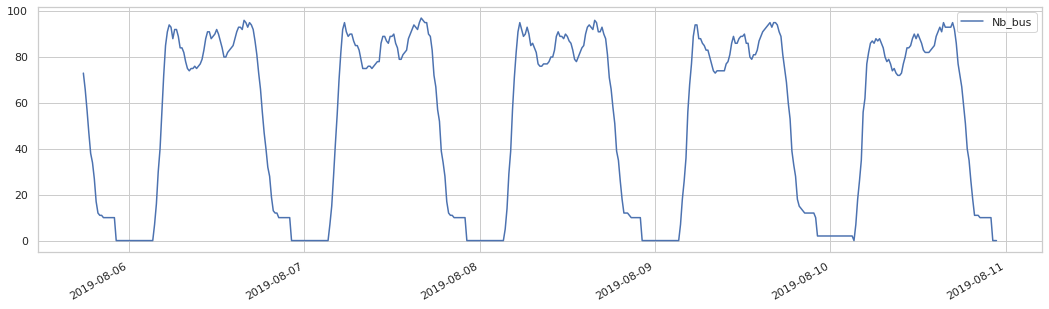

In [31]:
df_nb.plot(figsize=(18,5))
# -- sauvgarder le dernier graph en png
#plt.savefig('out.png')

#### Enquêter sur l'erreur ou les annomalies visiblent sur le graph nb_bus/t

* Il y' a des données manquantes mi-otcobre
* les dimanches apparaissent
* les jours fériés apparaissent
* les perdiodes de vacances scolaire apparaissent

#### Afficher le retard moyen au file du temps

<AxesSubplot:xlabel='date'>

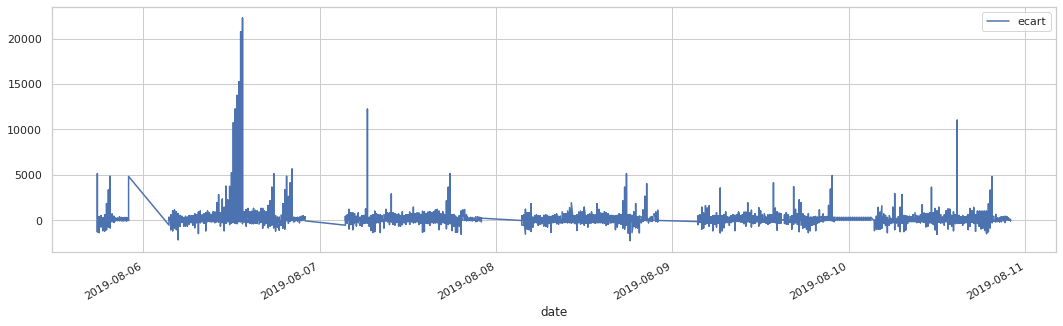

In [32]:

df[["date","ecart"]].set_index("date").plot(figsize=(18,5))

#### Afficher le retard moyen au file du temps par ligne

In [16]:
subdf = df[["date","ecart","nomligne"]].set_index("date")

nomligne
A - Remplacement Tram par Bus       AxesSubplot(0.125,0.2;0.775x0.68)
ARDENNE <> ROSERAIE                 AxesSubplot(0.125,0.2;0.775x0.68)
BEAUCOUZE <> ST BARTHELEMY          AxesSubplot(0.125,0.2;0.775x0.68)
BELLE BEILLE <> MONPLAISIR          AxesSubplot(0.125,0.2;0.775x0.68)
BELLE BEILLE EXPRESS <> GARES       AxesSubplot(0.125,0.2;0.775x0.68)
BOUCHEMAINE <> Z I  EST             AxesSubplot(0.125,0.2;0.775x0.68)
BRIOLLAY <> GARE                    AxesSubplot(0.125,0.2;0.775x0.68)
CIRCULAIRE VERNEAU GARE EUROPE      AxesSubplot(0.125,0.2;0.775x0.68)
CORNE <> GARE                       AxesSubplot(0.125,0.2;0.775x0.68)
CORNE <> GARE TRELAZE               AxesSubplot(0.125,0.2;0.775x0.68)
D NAVETTE MARCHE MONPLAISIR         AxesSubplot(0.125,0.2;0.775x0.68)
DJF  BELLE BEILLE <> MONPLAISIR     AxesSubplot(0.125,0.2;0.775x0.68)
DJF  TRELAZE <>  ST SYLVAIN         AxesSubplot(0.125,0.2;0.775x0.68)
DJF LORRAINE <> ST BARTHELEMY       AxesSubplot(0.125,0.2;0.775x0.68)
DJF MURS ER

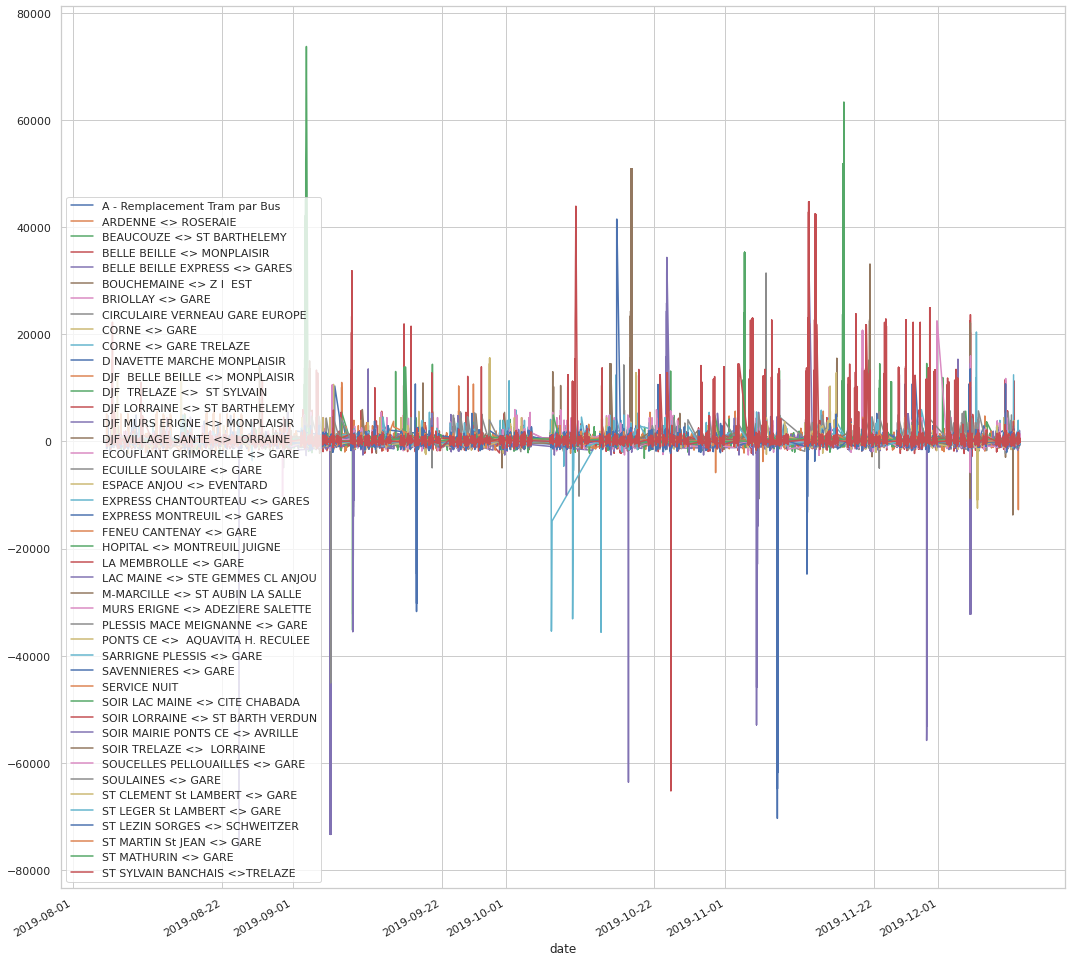

In [33]:
subdf.groupby('nomligne')['ecart'].plot(legend=True, figsize=(18,18))

#### Afficher le retard moyen par ligne

<AxesSubplot:xlabel='nomligne'>

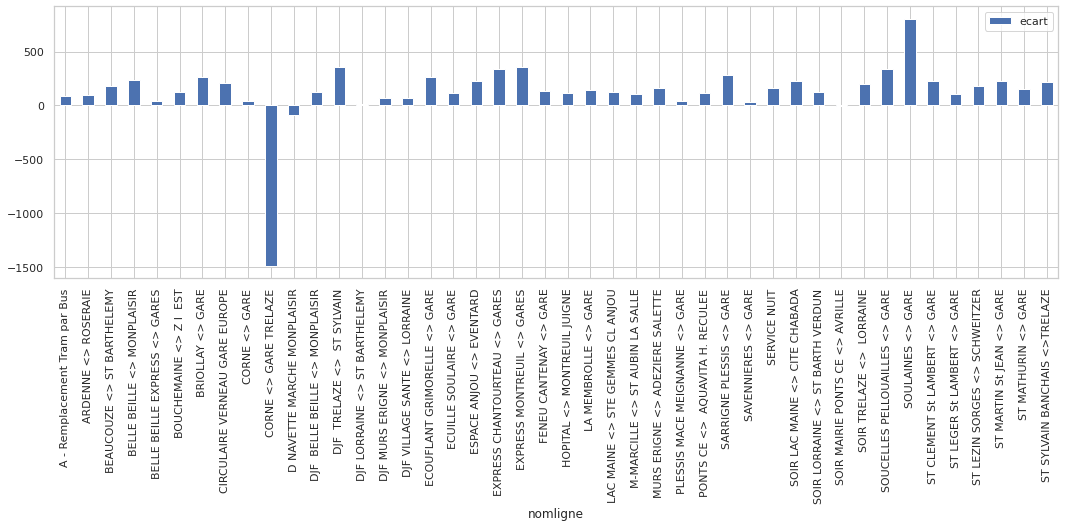

In [33]:
#ax = sns.relplot(x="nomligne", y="ecart", data=subdf)

subdf.groupby('nomligne').mean().plot.bar(figsize=(18,5))
#plt.show()


#### Afficher le retard moyen/heure de la journée

<AxesSubplot:xlabel='date'>

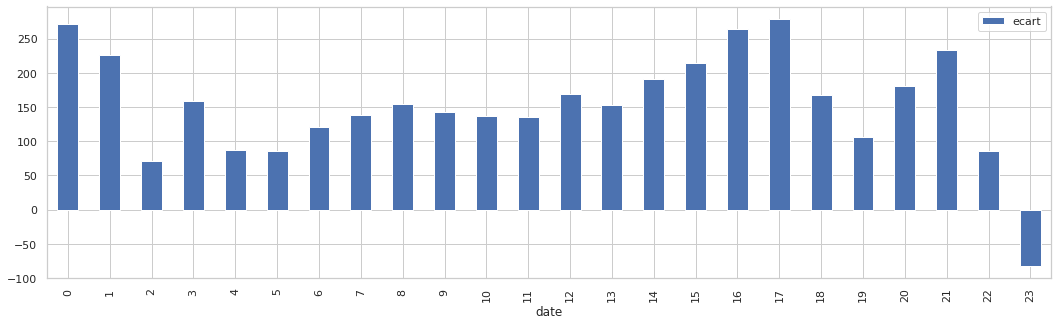

In [34]:
subdf.groupby(subdf.index.hour).mean().plot.bar(figsize=(18,5))

#### Trouver une regression lineaire entre le retard et l'heure de la journée
Cours théorique: https://cdn.aeon-creation.com/ESPL/4_theorie_regression_lineaire.pdf

In [58]:
subdf["h"] = subdf.index.hour
subdf.set_index("h")

ecart                          nomligne   j
h                                              
15    0.0       HOPITAL <> MONTREUIL JUIGNE  15
15    0.0     ST LEZIN SORGES <> SCHWEITZER  15
15  132.0          ESPACE ANJOU <> EVENTARD  15
15  156.0  PONTS CE <>  AQUAVITA H. RECULEE  15
15  225.0  PONTS CE <>  AQUAVITA H. RECULEE  15
..    ...                               ...  ..
15 -106.0     DJF MURS ERIGNE <> MONPLAISIR  15
15   -7.0               ARDENNE <> ROSERAIE  15
15   58.0       DJF  TRELAZE <>  ST SYLVAIN  15
15  234.0     A - Remplacement Tram par Bus  15
15 -131.0     A - Remplacement Tram par Bus  15

[63504 rows x 3 columns]

In [57]:
subdf

ecart                          nomligne   j   h
date                                                                
2019-10-24 15:00:04    0.0       HOPITAL <> MONTREUIL JUIGNE  15  15
2019-10-24 15:00:04    0.0     ST LEZIN SORGES <> SCHWEITZER  15  15
2019-10-24 15:00:04  132.0          ESPACE ANJOU <> EVENTARD  15  15
2019-10-24 15:00:04  156.0  PONTS CE <>  AQUAVITA H. RECULEE  15  15
2019-10-24 15:00:04  225.0  PONTS CE <>  AQUAVITA H. RECULEE  15  15
...                    ...                               ...  ..  ..
2019-08-11 15:00:04 -106.0     DJF MURS ERIGNE <> MONPLAISIR  15  15
2019-08-11 15:00:04   -7.0               ARDENNE <> ROSERAIE  15  15
2019-08-11 15:00:04   58.0       DJF  TRELAZE <>  ST SYLVAIN  15  15
2019-08-11 15:00:04  234.0     A - Remplacement Tram par Bus  15  15
2019-08-11 15:00:04 -131.0     A - Remplacement Tram par Bus  15  15

[63504 rows x 4 columns]

In [68]:
mean_df = subdf.groupby("h").mean()
mean_df

ecart   j
h                 
0   271.196970   0
1   225.400000   1
2    70.888889   2
3   158.526316   3
4    86.764253   4
5    85.334095   5
6   121.475135   6
7   138.875158   7
8   154.009605   8
9   142.483613   9
10  136.720486  10
11  135.347373  11
12  169.201351  12
13  153.670854  13
14  190.982320  14
15  214.647126  15
16  263.541234  16
17  278.831325  17
18  167.189888  18
19  105.515603  19
20  180.577815  20
21  233.022039  21
22   85.553333  22
23  -82.138889  23

In [82]:
median_df = subdf.groupby("h").median()
median_df

ecart   j
h            
0   101.5   0
1     6.5   1
2     0.0   2
3     8.0   3
4    27.5   4
5    29.0   5
6    34.0   6
7    42.0   7
8    46.0   8
9    48.0   9
10   47.0  10
11   38.0  11
12   42.0  12
13   50.0  13
14   56.0  14
15   53.0  15
16  104.0  16
17  105.0  17
18   41.0  18
19   21.0  19
20   24.0  20
21   26.0  21
22   36.5  22
23    0.0  23

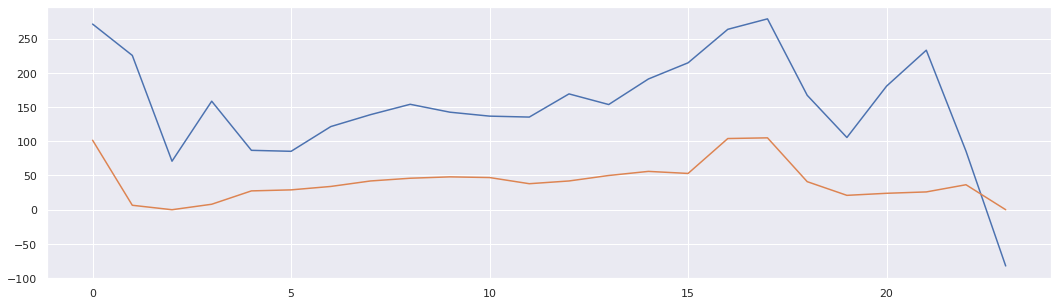

In [89]:
plt.figure(figsize=(18,5))
plt.plot(mean_df.index, mean_df['ecart'])
plt.plot(median_df.index, median_df['ecart'])

plt.show()


In [65]:
ndf = pd.DataFrame({"hours":subdf["h"], "ecart":subdf["ecart"]})
ndf

hours  ecart
date                             
2019-10-24 15:00:04     15    0.0
2019-10-24 15:00:04     15    0.0
2019-10-24 15:00:04     15  132.0
2019-10-24 15:00:04     15  156.0
2019-10-24 15:00:04     15  225.0
...                    ...    ...
2019-08-11 15:00:04     15 -106.0
2019-08-11 15:00:04     15   -7.0
2019-08-11 15:00:04     15   58.0
2019-08-11 15:00:04     15  234.0
2019-08-11 15:00:04     15 -131.0

[63504 rows x 2 columns]

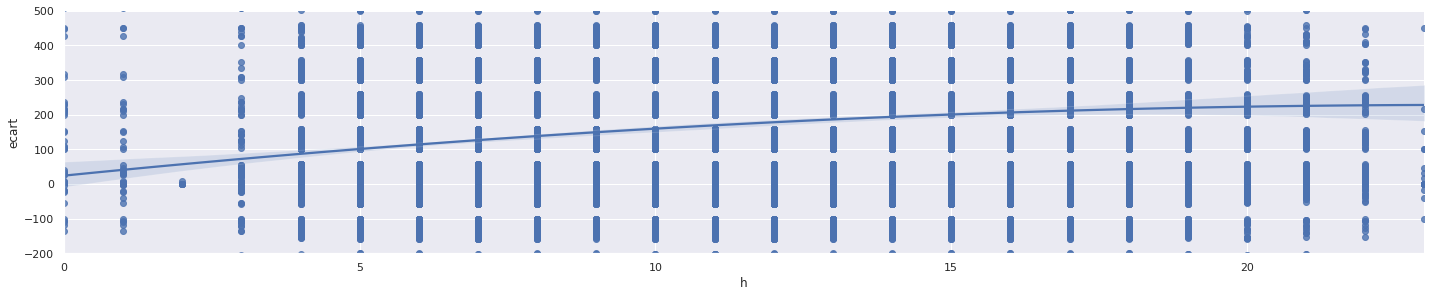

In [95]:
ax = sns.lmplot(x="h", y="ecart", data=subdf, 
                order=2, height=4, aspect=5)
ax.set(ylim=(-200,500))
plt.show()

### Eliminer les enregistrements hors valeur et refaire la regression

Voir le script borne_min_max_hiraire_theorique.py pour la génération du fichier json:
min_max.json

#### Mapping du fichier min_max.json 




In [9]:
# -- Creation d'un nouveau data frame avec les colonnes souhaites
subdf = df[["date","ecart","nomligne", "numarret"]]
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      41757 non-null  datetime64[ns]
 1   ecart     41757 non-null  float64       
 2   nomligne  41711 non-null  object        
 3   numarret  41757 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


In [10]:
# -- Chargement du dataframe des horaire min et max
with open('data/min_max.json') as f:
    data = json.load(f)

ma_list = []
for arret, val in data.items():
    ma_list.append({
        'numarret': float(arret), 
        'min': val['min'], 
        'max': val['max']
    })
   
minmax_df = pd.DataFrame(ma_list)
minmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   numarret  1825 non-null   float64
 1   min       1825 non-null   float64
 2   max       1825 non-null   float64
dtypes: float64(3)
memory usage: 42.9 KB


In [11]:
# -- Jointure des données min/max et des donnée d'écart
merged_db = subdf.join(minmax_df.set_index('numarret'), on='numarret', rsuffix="_minmax", how='left')
merged_db.info()
#merged_db.to_excel('merged_db.xlsx')

merged_db.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 0 to 15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      41757 non-null  datetime64[ns]
 1   ecart     41757 non-null  float64       
 2   nomligne  41711 non-null  object        
 3   numarret  41757 non-null  float64       
 4   min       37561 non-null  float64       
 5   max       37561 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.2+ MB


date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-05 17:45:04    0.0      BEAUCOUZE <> ST BARTHELEMY   16109.0   
2 2019-08-05 17:45:04    0.0      BELLE BEILLE <> MONPLAISIR    2607.0   
3 2019-08-05 17:45:04   -4.0        ESPACE ANJOU <> EVENTARD    3061.0   
4 2019-08-05 17:45:04   23.0   ST LEZIN SORGES <> SCHWEITZER   14457.0   

       min       max  
0  62800.0  205000.0  
1  70300.0  212500.0  
2  62000.0  234100.0  
3  62023.0  204223.0  
4  63000.0  200400.0

In [12]:
merged_db = merged_db[merged_db['min'].isnull() == False]
merged_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37561 entries, 0 to 15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      37561 non-null  datetime64[ns]
 1   ecart     37561 non-null  float64       
 2   nomligne  37545 non-null  object        
 3   numarret  37561 non-null  float64       
 4   min       37561 non-null  float64       
 5   max       37561 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.0+ MB


In [13]:
amerged_db = subdf.merge(minmax_df, on='numarret')
amerged_db.info()
amerged_db.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37561 entries, 0 to 37560
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      37561 non-null  datetime64[ns]
 1   ecart     37561 non-null  float64       
 2   nomligne  37545 non-null  object        
 3   numarret  37561 non-null  float64       
 4   min       37561 non-null  float64       
 5   max       37561 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.0+ MB


date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-06 05:00:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
2 2019-08-06 05:15:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
3 2019-08-06 05:30:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
4 2019-08-06 05:45:02    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   

       min       max  
0  62800.0  205000.0  
1  62800.0  205000.0  
2  62800.0  205000.0  
3  62800.0  205000.0  
4  62800.0  205000.0

In [14]:
# -- filtrer les données l'horaire doit être dans les bornes min/max

def fun(el):
    ret = el.hour * 10000 + el.minute * 100 + el.second
    return ret

merged_db['hours_as_float'] = merged_db['date'].map(fun)
merged_db.head()

date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-05 17:45:04    0.0      BEAUCOUZE <> ST BARTHELEMY   16109.0   
2 2019-08-05 17:45:04    0.0      BELLE BEILLE <> MONPLAISIR    2607.0   
3 2019-08-05 17:45:04   -4.0        ESPACE ANJOU <> EVENTARD    3061.0   
4 2019-08-05 17:45:04   23.0   ST LEZIN SORGES <> SCHWEITZER   14457.0   

       min       max  hours_as_float  
0  62800.0  205000.0          174504  
1  70300.0  212500.0          174504  
2  62000.0  234100.0          174504  
3  62023.0  204223.0          174504  
4  63000.0  200400.0          174504

In [15]:
# -- filtrage du dataframe

merged_db.info()
reduced_df = merged_db[merged_db['hours_as_float'] < merged_db['max']]
reduced_df = reduced_df[reduced_df['hours_as_float'] > reduced_df['min']]
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37561 entries, 0 to 15
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            37561 non-null  datetime64[ns]
 1   ecart           37561 non-null  float64       
 2   nomligne        37545 non-null  object        
 3   numarret        37561 non-null  float64       
 4   min             37561 non-null  float64       
 5   max             37561 non-null  float64       
 6   hours_as_float  37561 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31310 entries, 0 to 0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31310 non-null  datetime64[ns]
 1   ecart           31310 non-null  float64       
 2   nomligne        31310 non-nul

<AxesSubplot:>

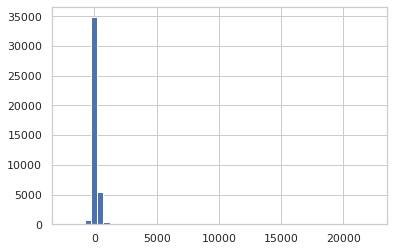

In [261]:
df['ecart'].hist(bins=50)

<AxesSubplot:>

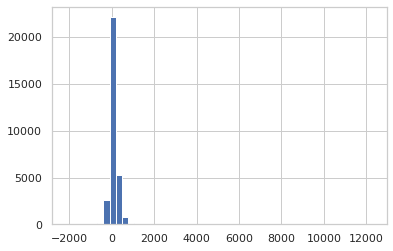

In [262]:
reduced_df['ecart'].hist(bins=50)

In [263]:
# Affichage des ecarts min et max avant et après filtrage

print(df['ecart'].max()/3600)
print(reduced_df['ecart'].max()/3600)

print(df['ecart'].min()/3600)
print(reduced_df['ecart'].min()/3600)

6.180833333333333
3.3975
-0.6147222222222222
-0.585


In [16]:
# Filtrage des écart superieur à 5400 seconds
reduced_df.info()
reduced_df = reduced_df[reduced_df['ecart'] < 5400]
reduced_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31310 entries, 0 to 0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31310 non-null  datetime64[ns]
 1   ecart           31310 non-null  float64       
 2   nomligne        31310 non-null  object        
 3   numarret        31310 non-null  float64       
 4   min             31310 non-null  float64       
 5   max             31310 non-null  float64       
 6   hours_as_float  31310 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31308 entries, 0 to 0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31308 non-null  datetime64[ns]
 1   ecart           31308 non-null  float64       
 2   nomligne        31308 non-null

In [265]:
# Affichage des ecarts min et max avant et après filtrage

print(df['ecart'].max()/3600)
print(reduced_df['ecart'].max()/3600)

print(df['ecart'].min()/3600)
print(reduced_df['ecart'].min()/3600)

6.180833333333333
1.2352777777777777
-0.6147222222222222
-0.585


<AxesSubplot:>

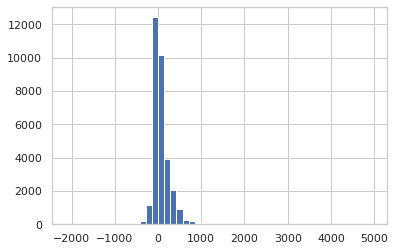

In [251]:
reduced_df['ecart'].hist(bins=50)

In [17]:
# -- Indexation par date
bmerged_db = reduced_df.set_index('date')

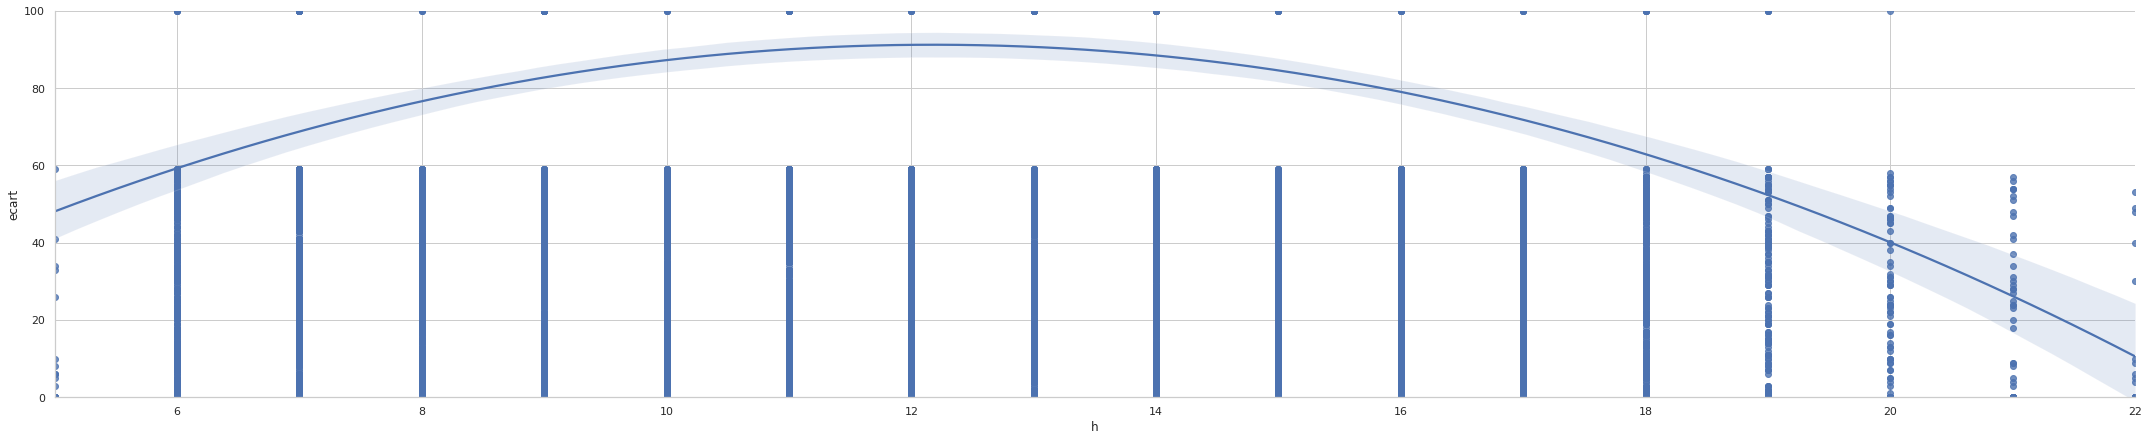

In [86]:
# -- ajout de la colonne h pour l'heure
bmerged_db["h"] = bmerged_db.index.hour

# -- Calcule de la regression linéaire
ax = sns.lmplot(x="h", y="ecart", data=bmerged_db, 
                order=2, height=6, aspect=5)
ax.set(ylim=(0,100), )
plt.show()

### Afficher les coefficients de la regression

Seaborn ne permet pas directement de le faire, nous utiliserons numpy

In [30]:
from numpy.polynomial import Chebyshev
coefficients = Chebyshev.fit(bmerged_db["h"], bmerged_db["ecart"], deg=2)
print(coefficients)

59.5366022692205 - 18.753776865970377·T₁(x) - 30.2079097438528·T₂(x)


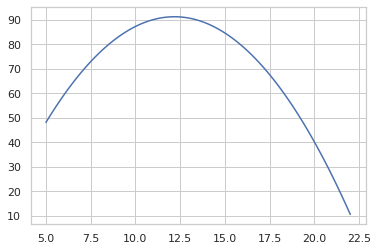

In [83]:
# -- affichage de la courge de regression par matplotlib
poly_values = coefficients.linspace()
plt.plot(poly_values[0],poly_values[1])

### Determiner si la météo à une influence

In [269]:
# -- on repart du data frame reduced_df
reduced_df.head()

date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-05 17:45:04    0.0      BEAUCOUZE <> ST BARTHELEMY   16109.0   
2 2019-08-05 17:45:04    0.0      BELLE BEILLE <> MONPLAISIR    2607.0   
3 2019-08-05 17:45:04   -4.0        ESPACE ANJOU <> EVENTARD    3061.0   
4 2019-08-05 17:45:04   23.0   ST LEZIN SORGES <> SCHWEITZER   14457.0   

       min       max  hours_as_float  
0  62800.0  205000.0          174504  
1  70300.0  212500.0          174504  
2  62000.0  234100.0          174504  
3  62023.0  204223.0          174504  
4  63000.0  200400.0          174504

In [270]:
# -- ajout des donnée météo (data/weather.json)
with open('data/weather.json') as f:
    data = json.load(f)

data[:2]

[{'date': '2019-11-13T00:00:00',
  'prec': 0.0,
  'pressure': 995.1,
  'temp': 4.3,
  'wind': 11.0,
  'wind_raf': 20.5},
 {'date': '2019-11-13T23:00:00',
  'prec': 0.0,
  'pressure': 995.6,
  'temp': 4.8,
  'wind': 11.0,
  'wind_raf': 16.9}]

In [272]:
weather_df = pd.DataFrame(data)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3673 non-null   object 
 1   prec      3673 non-null   float64
 2   pressure  3673 non-null   float64
 3   temp      3673 non-null   float64
 4   wind      3673 non-null   float64
 5   wind_raf  3673 non-null   float64
dtypes: float64(5), object(1)
memory usage: 172.3+ KB


In [291]:
# -- ajout d'une colonne mappable avec le dataframe "weather" (weather_df)

def fun(date):
    return date.strftime('%Y-%m-%dT%H:00:00')

reduced_df['date_str'] = reduced_df['date'].map(fun)

reduced_df.head()

date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-05 17:45:04    0.0      BEAUCOUZE <> ST BARTHELEMY   16109.0   
2 2019-08-05 17:45:04    0.0      BELLE BEILLE <> MONPLAISIR    2607.0   
3 2019-08-05 17:45:04   -4.0        ESPACE ANJOU <> EVENTARD    3061.0   
4 2019-08-05 17:45:04   23.0   ST LEZIN SORGES <> SCHWEITZER   14457.0   

       min       max  hours_as_float             date_str  
0  62800.0  205000.0          174504  2019-08-05T17:00:00  
1  70300.0  212500.0          174504  2019-08-05T17:00:00  
2  62000.0  234100.0          174504  2019-08-05T17:00:00  
3  62023.0  204223.0          174504  2019-08-05T17:00:00  
4  63000.0  200400.0          174504  2019-08-05T17:00:00

In [289]:
# -- mapping avec la météo
weather_reduced_df = reduced_df.join(weather_df.set_index('date'), on='date_str')
weather_reduced_df.head()

date  ecart                        nomligne  numarret  \
0 2019-08-05 17:45:04    0.0  CIRCULAIRE VERNEAU GARE EUROPE   55947.0   
1 2019-08-05 17:45:04    0.0      BEAUCOUZE <> ST BARTHELEMY   16109.0   
2 2019-08-05 17:45:04    0.0      BELLE BEILLE <> MONPLAISIR    2607.0   
3 2019-08-05 17:45:04   -4.0        ESPACE ANJOU <> EVENTARD    3061.0   
4 2019-08-05 17:45:04   23.0   ST LEZIN SORGES <> SCHWEITZER   14457.0   

       min       max  hours_as_float             date_str  prec  pressure  \
0  62800.0  205000.0          174504  2019-08-05T17:00:00   0.0    1014.1   
1  70300.0  212500.0          174504  2019-08-05T17:00:00   0.0    1014.1   
2  62000.0  234100.0          174504  2019-08-05T17:00:00   0.0    1014.1   
3  62023.0  204223.0          174504  2019-08-05T17:00:00   0.0    1014.1   
4  63000.0  200400.0          174504  2019-08-05T17:00:00   0.0    1014.1   

   temp  wind  wind_raf  
0  25.6  18.0      35.3  
1  25.6  18.0      35.3  
2  25.6  18.0      35.3  
3  25.6  18.0      35.3  
4  25.6  18.0      35.3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='wind', ylabel='ecart'>

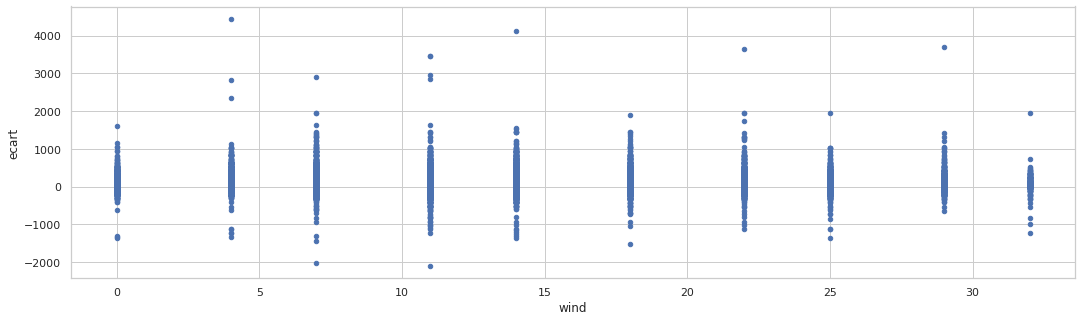

In [307]:
weather_reduced_df[['ecart', 'wind']].plot(
    x='wind',y='ecart',
    kind='scatter', figsize=(18,5), )

array([[<AxesSubplot:title={'center':'wind'}>]], dtype=object)

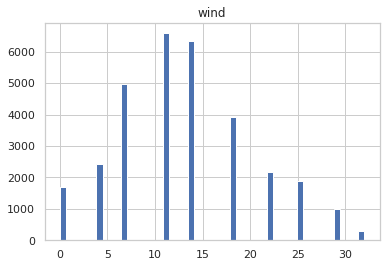

In [308]:
weather_reduced_df[['wind']].hist(bins=50)